In [76]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import os
import warnings
from typing import List, Dict
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
high_df = pd.read_csv("high_popularity_spotify_data.csv")
low_df = pd.read_csv("low_popularity_spotify_data.csv")


In [80]:
high_df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [82]:
print(len(high_df))
print(len(low_df))

1686
3145


In [84]:
print(high_df['track_popularity'])

0       100
1        97
2        93
3        81
4        98
       ... 
1681     76
1682     74
1683     69
1684     82
1685     69
Name: track_popularity, Length: 1686, dtype: int64


In [86]:
spot_df = pd.concat([high_df, low_df])
print(spot_df)

      energy    tempo  danceability playlist_genre  loudness  liveness  \
0      0.592  157.969         0.521            pop    -7.777    0.1220   
1      0.507  104.978         0.747            pop   -10.171    0.1170   
2      0.808  108.548         0.554            pop    -4.169    0.1590   
3      0.910  112.966         0.670            pop    -4.070    0.3040   
4      0.783  149.027         0.777            pop    -4.477    0.3550   
...      ...      ...           ...            ...       ...       ...   
3140   0.424   75.466         0.352         indian    -8.009    0.2420   
3141   0.349  147.193         0.471         indian   -16.633    0.2860   
3142   0.595  174.308         0.436         indian   -11.494    0.0939   
3143   0.591  174.760         0.489         indian   -10.843    0.0770   
3144   0.816  170.938         0.270         indian    -3.815    0.3170   

      valence                                       track_artist  \
0       0.535                              

In [88]:
print(spot_df.dtypes)

energy                      float64
tempo                       float64
danceability                float64
playlist_genre               object
loudness                    float64
liveness                    float64
valence                     float64
track_artist                 object
time_signature              float64
speechiness                 float64
track_popularity              int64
track_href                   object
uri                          object
track_album_name             object
playlist_name                object
analysis_url                 object
track_id                     object
track_name                   object
track_album_release_date     object
instrumentalness            float64
track_album_id               object
mode                        float64
key                         float64
duration_ms                 float64
acousticness                float64
id                           object
playlist_subgenre            object
type                        

In [90]:
print(spot_df['mode'])
print(spot_df['uri'])

0       0.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
3140    1.0
3141    1.0
3142    1.0
3143    0.0
3144    1.0
Name: mode, Length: 4831, dtype: float64
0       spotify:track:2plbrEY59IikOBgBGLjaoe
1       spotify:track:6dOtVTDdiauQNBQEDOtlAB
2       spotify:track:7ne4VBA60CxGM75vw0EYad
3       spotify:track:1d7Ptw3qYcfpdLNL5REhtJ
4       spotify:track:5vNRhkKd0yEAg8suGBpjeY
                        ...                 
3140    spotify:track:1IkR0OgVI1gydC4S6jnG2B
3141    spotify:track:4ZFM5yFsjEzvZ1XmP27L5r
3142    spotify:track:5wZQXUcphAyBZfVdWmAiYX
3143    spotify:track:5Ca5l5vDzIOZdVwwWCxAds
3144    spotify:track:0HmenrANrrNVi8244GsYB5
Name: uri, Length: 4831, dtype: object


In [92]:
#missing values
print(spot_df.isna().sum())

energy                      1
tempo                       1
danceability                1
playlist_genre              0
loudness                    1
liveness                    1
valence                     1
track_artist                0
time_signature              1
speechiness                 1
track_popularity            0
track_href                  1
uri                         1
track_album_name            1
playlist_name               0
analysis_url                1
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            1
track_album_id              0
mode                        1
key                         1
duration_ms                 1
acousticness                1
id                          1
playlist_subgenre           0
type                        1
playlist_id                 0
dtype: int64


In [94]:
#easy drop
spot_df = spot_df.dropna()
print(spot_df.isna().sum())

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            0
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64


In [96]:
#check dupls
print(spot_df['track_name'].nunique())
print(len(spot_df))

4371
4829


In [98]:
spot_df = spot_df.drop_duplicates()
print(spot_df['track_name'].nunique())

4371


In [100]:
print(spot_df[spot_df['track_name'] == 'Lonely'])

      energy    tempo  danceability playlist_genre  loudness  liveness  \
1323   0.815  124.975         0.576     electronic    -7.088    0.0911   
3030   0.825  103.051         0.644            pop    -3.591    0.3350   

      valence               track_artist  time_signature  speechiness  ...  \
1323    0.039  Nils Hoffmann, Rae Morris             4.0       0.0334  ...   
3030    0.593                     LIAMOO             4.0       0.0388  ...   

      instrumentalness          track_album_id mode  key duration_ms  \
1323           0.00661  3o2K9k9I6qN5U8VAD8vfVp  0.0  4.0    250921.0   
3030           0.00000  0vOHbxKa0A5MSOs5NReZgl  0.0  9.0    181333.0   

     acousticness                      id playlist_subgenre            type  \
1323      0.00966  1FTrDODUS6bWx3eSCWu1Ym        deep house  audio_features   
3030      0.01770  67DpIQJB2cLRyJdd0tG80D            scandi  audio_features   

                 playlist_id  
1323  37i9dQZF1DX2TRYkJECvfC  
3030  59z06GgF6TTDbm5cr1R

In [102]:
#just songs with same name. not actually duplicates
print(spot_df.dtypes)

energy                      float64
tempo                       float64
danceability                float64
playlist_genre               object
loudness                    float64
liveness                    float64
valence                     float64
track_artist                 object
time_signature              float64
speechiness                 float64
track_popularity              int64
track_href                   object
uri                          object
track_album_name             object
playlist_name                object
analysis_url                 object
track_id                     object
track_name                   object
track_album_release_date     object
instrumentalness            float64
track_album_id               object
mode                        float64
key                         float64
duration_ms                 float64
acousticness                float64
id                           object
playlist_subgenre            object
type                        

In [104]:
spot_df = spot_df.drop(['track_name', 'track_album_id', 'uri', 'track_album_name', 'id', 'playlist_id', 'track_album_release_date', 'playlist_name', 'track_href', 'analysis_url', 'track_id', 'type', 'track_artist', 'time_signature'], axis=1)
print(spot_df.columns)

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'speechiness', 'track_popularity',
       'instrumentalness', 'mode', 'key', 'duration_ms', 'acousticness',
       'playlist_subgenre'],
      dtype='object')


In [106]:
print(spot_df['playlist_genre'].nunique())
print(spot_df['playlist_subgenre'].nunique())
print(spot_df)

35
84
      energy    tempo  danceability playlist_genre  loudness  liveness  \
0      0.592  157.969         0.521            pop    -7.777    0.1220   
1      0.507  104.978         0.747            pop   -10.171    0.1170   
2      0.808  108.548         0.554            pop    -4.169    0.1590   
3      0.910  112.966         0.670            pop    -4.070    0.3040   
4      0.783  149.027         0.777            pop    -4.477    0.3550   
...      ...      ...           ...            ...       ...       ...   
3140   0.424   75.466         0.352         indian    -8.009    0.2420   
3141   0.349  147.193         0.471         indian   -16.633    0.2860   
3142   0.595  174.308         0.436         indian   -11.494    0.0939   
3143   0.591  174.760         0.489         indian   -10.843    0.0770   
3144   0.816  170.938         0.270         indian    -3.815    0.3170   

      valence  speechiness  track_popularity  instrumentalness  mode   key  \
0       0.535       0.0304 

In [108]:
spot_df = spot_df.drop(['playlist_subgenre'], axis=1)


In [110]:
#categories to int

In [112]:
genre_num = 1
genre_dict = {}
for genre in spot_df['playlist_genre']:
    if (genre_dict.get(genre) == None):
        genre_dict[genre] = genre_num
        genre_num += 1
print(genre_dict)

{'pop': 1, 'rock': 2, 'jazz': 3, 'classical': 4, 'hip-hop': 5, 'afrobeats': 6, 'latin': 7, 'indian': 8, 'country': 9, 'r&b': 10, 'electronic': 11, 'soul': 12, 'gaming': 13, 'j-pop': 14, 'metal': 15, 'reggae': 16, 'k-pop': 17, 'arabic': 18, 'punk': 19, 'blues': 20, 'folk': 21, 'lofi': 22, 'brazilian': 23, 'turkish': 24, 'ambient': 25, 'korean': 26, 'world': 27, 'indie': 28, 'mandopop': 29, 'cantopop': 30, 'wellness': 31, 'gospel': 32, 'funk': 33, 'soca': 34, 'disco': 35}


In [114]:
spot_df['playlist_genre'] = spot_df['playlist_genre'].map(genre_dict)

In [116]:
print(spot_df)

      energy    tempo  danceability  playlist_genre  loudness  liveness  \
0      0.592  157.969         0.521               1    -7.777    0.1220   
1      0.507  104.978         0.747               1   -10.171    0.1170   
2      0.808  108.548         0.554               1    -4.169    0.1590   
3      0.910  112.966         0.670               1    -4.070    0.3040   
4      0.783  149.027         0.777               1    -4.477    0.3550   
...      ...      ...           ...             ...       ...       ...   
3140   0.424   75.466         0.352               8    -8.009    0.2420   
3141   0.349  147.193         0.471               8   -16.633    0.2860   
3142   0.595  174.308         0.436               8   -11.494    0.0939   
3143   0.591  174.760         0.489               8   -10.843    0.0770   
3144   0.816  170.938         0.270               8    -3.815    0.3170   

      valence  speechiness  track_popularity  instrumentalness  mode   key  \
0       0.535       0

In [118]:
X = spot_df.drop(columns = 'track_popularity')
y = spot_df['track_popularity']

In [120]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
numeric_cols = X.select_dtypes(include='number').columns

In [124]:
# scale numeric features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train[numeric_cols])
test_scaled = scaler.transform(X_test[numeric_cols])

In [126]:
# combine scaled and categorical columns
X_train = np.hstack([train_scaled, X_train.drop(columns=numeric_cols).values])
X_test = np.hstack([test_scaled, X_test.drop(columns=numeric_cols).values])

In [128]:
print(X_train.shape)
print(X_test.shape)

(3828, 13)
(958, 13)


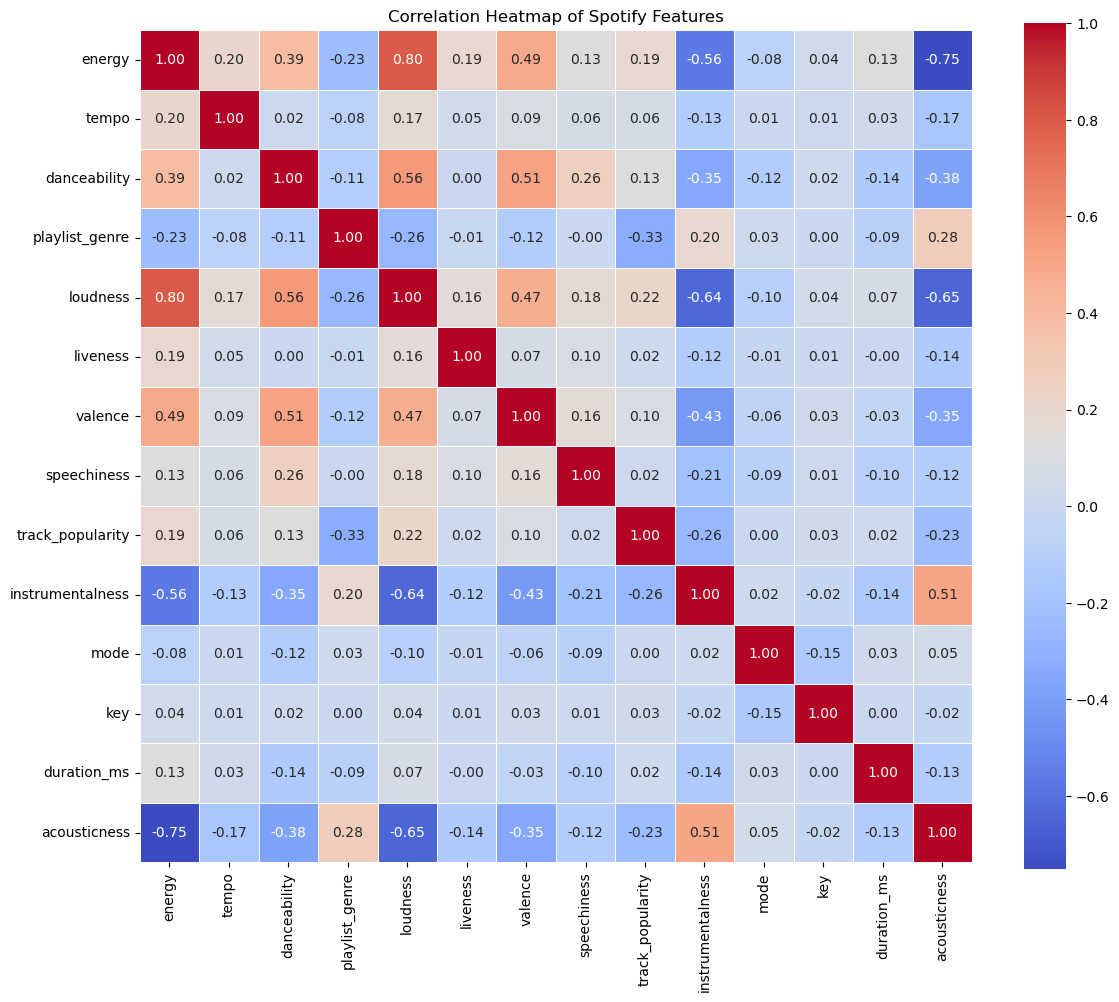

In [130]:
corr = spot_df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Spotify Features")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Features')

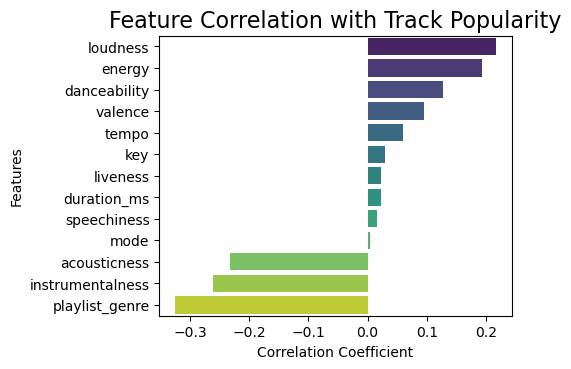

In [131]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 2)
target_corr = correlation_matrix['track_popularity'].sort_values(ascending=False)
target_corr.drop('track_popularity', inplace=True)  

sns.barplot(
    x=target_corr.values,
    y=target_corr.index,
    hue=target_corr.index,       
    palette='viridis',
    dodge=False,
    legend=False            
)

plt.title('Feature Correlation with Track Popularity', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')